In [51]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Preparando os dados

In [52]:
# Instanciando a importação do módulo pathlib através do Path
from pathlib import Path
# Cria uma variável para armazenar o caminho
image_dir = Path('Braille Dataset')  

In [53]:
# Armazenando a listagem dos arquivos com extensão do tipo JPG 
dir_list = list(image_dir.glob('*.jpg'))
# Checando retorno para teste
print(dir_list[0])

Braille Dataset\a1.JPG0dim.jpg


In [54]:
# Pegando o tamanho da lista
image_count = len(dir_list)
# Checando retorno do tamanho da lista
image_count

1560

In [55]:
# Preparando lista 'name_list' com os arquivos 
name_list = []
for i in dir_list:
    name_list.append(os.path.basename(i)[0])

In [56]:
#Descrição do módulo cv2 importado acima
import cv2
#Abre as imagens e coloca na lista nomeada como 'images'
images = []
for dir in dir_list:
    I = cv2.imread(str(dir))
    images.append(I)

In [57]:
#Transforma ambas as listas em matrizes numpy
images_list = np.array(images)
name_list = np.array(name_list).T # 'T' transpose - converte colunas em linhas

In [58]:
#Descrição do módulo sklearn.preprocessing importado acima
from sklearn.preprocessing import LabelEncoder

#Codifica 'name_list' e normaliza 'image_list'
le = LabelEncoder()
name_list = le.fit_transform(name_list)

#Imagens ocultas de 0 a 255 (informações de pixel)
images_list = images_list / 255.0 
print(images_list[0])

[[[0.76078431 0.76078431 0.76078431]
  [0.8        0.8        0.8       ]
  [0.80784314 0.80784314 0.80784314]
  ...
  [0.76862745 0.76862745 0.76862745]
  [0.76862745 0.76862745 0.76862745]
  [0.76862745 0.76862745 0.76862745]]

 [[0.75686275 0.75686275 0.75686275]
  [0.69411765 0.69411765 0.69411765]
  [0.7372549  0.7372549  0.7372549 ]
  ...
  [0.76862745 0.76862745 0.76862745]
  [0.76862745 0.76862745 0.76862745]
  [0.76862745 0.76862745 0.76862745]]

 [[0.78039216 0.78039216 0.78039216]
  [0.79607843 0.79607843 0.79607843]
  [0.76470588 0.76470588 0.76470588]
  ...
  [0.76862745 0.76862745 0.76862745]
  [0.76862745 0.76862745 0.76862745]
  [0.76862745 0.76862745 0.76862745]]

 ...

 [[0.76862745 0.76862745 0.76862745]
  [0.77254902 0.77254902 0.77254902]
  [0.76470588 0.76470588 0.76470588]
  ...
  [0.76862745 0.76862745 0.76862745]
  [0.76862745 0.76862745 0.76862745]
  [0.76862745 0.76862745 0.76862745]]

 [[0.77254902 0.77254902 0.77254902]
  [0.77647059 0.77647059 0.77647059]


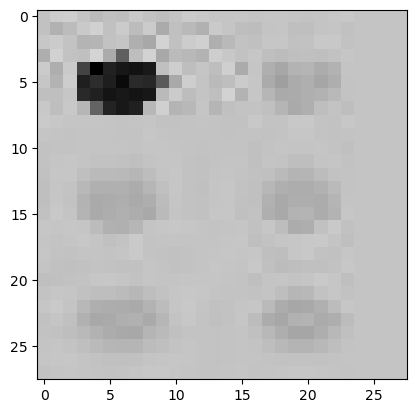

In [59]:
# O módulo matplotlib.pyplot importado permite a plotagem
import matplotlib.pyplot as plt

plt.imshow(images_list[0])

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
#Separando os conjutos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(images_list, name_list, test_size=0.2, random_state=42)

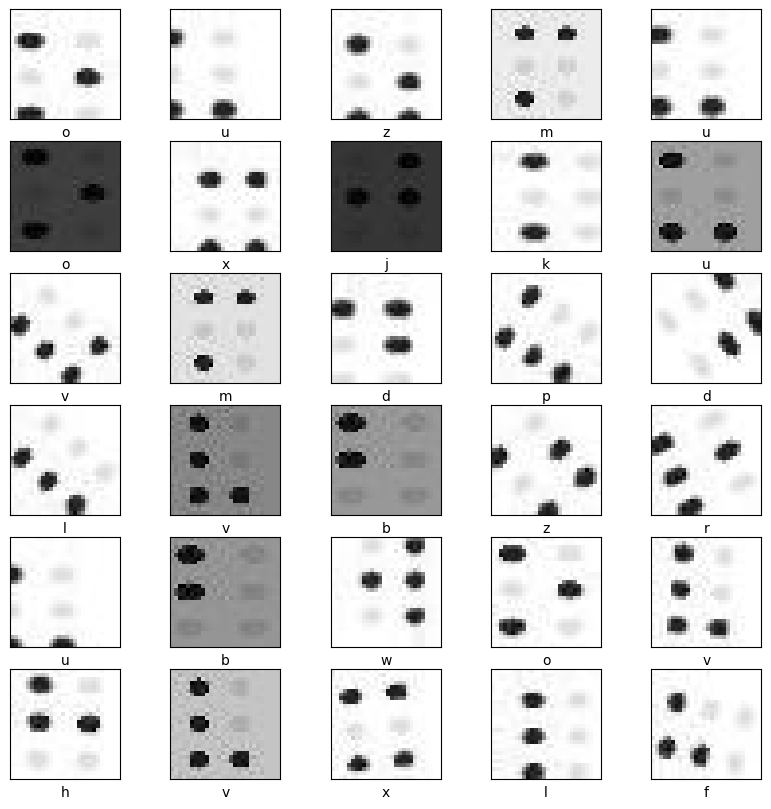

In [62]:
#Mostrando os dados
class_names = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 
               'h', 'i', 'j', 'k', 'l', 'm', 'n', 
               'o', 'p', 'q', 'r', 's', 't', 'u', 
               'v', 'w', 'x', 'y', 'z']

plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(6,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(class_names[y_train[i]])
plt.show()

# Criando o Modelo

In [63]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', strides=(1, 1), activation='relu', input_shape=(28,28,3)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', strides=(1,1), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.2, input_shape=(28,1)),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding='same', strides=(1,1), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25, input_shape=(28,1)),
    keras.layers.BatchNormalization(),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(units=512, activation="relu"),
    keras.layers.Dropout(0.5, input_shape=(28,1)),
    keras.layers.BatchNormalization(),

    keras.layers.Dense(units=288, activation="relu"),
    keras.layers.Dense(units=26, activation="softmax") #camada de saída
])

c:\Users\ASUS\anaconda3\envs\img_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\ASUS\anaconda3\envs\img_env\Lib\site-packages\keras\src\layers\regularization\dropout.py:42: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [64]:
# checkpoint_path = "./braille.ckpt"
# checkpoint_dir = os.path.dirname(checkpoint_path)
# batch_size = 32

# # Cria um callback que salve os pesos do modelo em intervalos de 5 épocas
# save_callback = tf.keras.callbacks.ModelCheckpoint(
#     filepath=checkpoint_path, 
#     verbose=1, 
#     save_weights_only=True,
#     save_freq=5*batch_size)

# Treinando o modelo

In [65]:
model.compile(optimizer="Adam", loss="SparseCategoricalCrossentropy", metrics=["sparse_categorical_accuracy"])

In [66]:
from keras.callbacks import EarlyStopping

In [67]:
es1 = EarlyStopping(patience=20, monitor="val_sparse_categorical_accuracy", mode="auto")
es2 = EarlyStopping(patience=20, monitor="val_loss", mode="auto")

In [68]:
history = model.fit(x=X_train,
                    y=y_train,
                    epochs=100,
                    validation_split=0.3,
                    # callbacks=[es1, es2, save_callback]
                    )

Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 3.3080 - sparse_categorical_accuracy: 0.0939 - val_loss: 3.4385 - val_sparse_categorical_accuracy: 0.0427
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 1.9735 - sparse_categorical_accuracy: 0.4510 - val_loss: 5.0971 - val_sparse_categorical_accuracy: 0.0427
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 1.3822 - sparse_categorical_accuracy: 0.5960 - val_loss: 6.9475 - val_sparse_categorical_accuracy: 0.0427
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 1.0119 - sparse_categorical_accuracy: 0.6994 - val_loss: 8.4212 - val_sparse_categorical_accuracy: 0.0427
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.8820 - sparse_categorical_accuracy: 0.7468 - val_loss: 8.7067 - val_sparse_categorical_accuracy: 0.0427
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.7178 - sparse_categorical_accuracy: 0.8014 - val_loss: 10.2483 - val_sparse_categorical_accuracy: 0.0427
Epo

In [69]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 3, 3, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 288)            │       147,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 26)             │         7,514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,126,384 (19.56 MB)

 Trainable params: 1,708,154 (6.52 MB)

 Non-trainable params: 1,920 (7.50 KB)

 Optimizer params: 3,416,310 (13.03 MB)

In [70]:
time = np.arange(1, len(history.history['loss'])+1)

In [71]:
import seaborn as sns

# Resultados

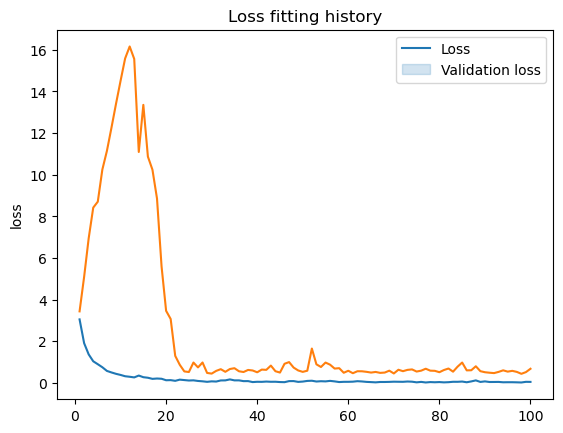

In [72]:
sns.lineplot(data=history.history, x=time, y='loss')
sns.lineplot(data=history.history, x=time, y='val_loss')
plt.title('Loss fitting history')
plt.legend(labels=['Loss', 'Validation loss'])
plt.show()

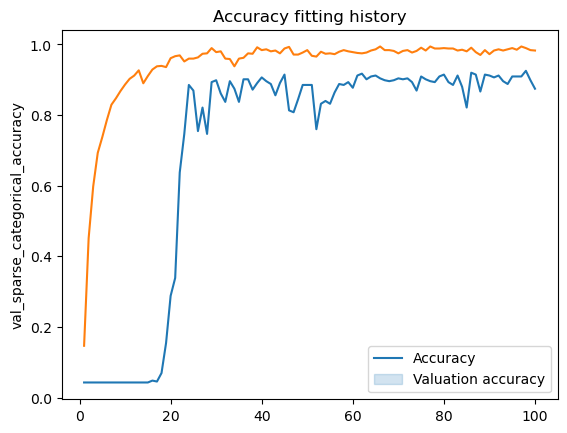

In [73]:
sns.lineplot(data=history.history, x=time, y='val_sparse_categorical_accuracy')
sns.lineplot(data=history.history, x=time, y='sparse_categorical_accuracy')
plt.title('Accuracy fitting history')
plt.legend(labels=['Accuracy', 'Valuation accuracy'])
plt.show()

In [74]:
test_loss, test_acc = model.evaluate(X_test, y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.5900 - sparse_categorical_accuracy: 0.8898


In [75]:
print('Loss', test_loss)
print('Accuracy', test_acc)

Loss 0.49646180868148804
Accuracy 0.9038461446762085


index:  24
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
score:  [[3.3797870e-28 1.9044607e-16 6.0665949e-26 1.4605291e-24 7.8397723e-19
  1.0915985e-22 6.1689410e-14 1.5486731e-12 8.4250850e-24 7.2463318e-23
  1.3611462e-22 4.9395666e-17 6.7661620e-30 7.4200016e-26 1.5932485e-14
  1.7203580e-18 8.6104755e-14 1.0000000e+00 2.5370276e-21 2.7638905e-16
  1.2304685e-20 1.5585289e-12 3.8101777e-25 6.8999962e-26 4.3035179e-26
  4.8557934e-17]]
Predicted label: r


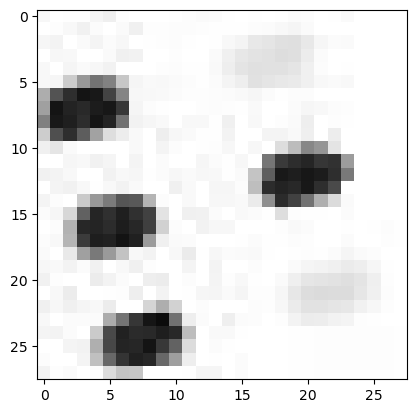

In [76]:
from random import randrange
print("index: ", randrange(312))
index_image = randrange(312)
prediction_scores = model.predict(np.expand_dims(X_test[index_image], axis=0))
predicted_index = np.argmax(prediction_scores)
plt.imshow(X_test[index_image])
print("score: ", prediction_scores)
print("Predicted label: " + class_names[predicted_index])

# Referências

https://www.kaggle.com/code/amanrosekaursethi/braille-character-detection-using-cnn